In [2]:
from math import log
import numpy as np

# beam search
def beam_search_decoder(data, k):
    sequences = [[list(), 0.0]]
    # walk over each step in sequence

    max_T, max_A = data.shape

    # Loop over time
    for t in range(max_T):
        all_candidates = list()
        # expand each current candidate
        for i in range(len(sequences)):
            seq, score = sequences[i]
            # Loop over possible alphabet outputs
            for c in range(max_A - 1):
                candidate = [seq + [c], score - log(data[t, c])]
                all_candidates.append(candidate)
        # order all candidates by score
        ordered = sorted(all_candidates, key=lambda tup:tup[1])
        # select k best
        sequences = ordered[:k]
    return sequences

# define a sequence of 10 words (rows) over a vocab of 5 words (columns), 
# e.g.
#      a  bites cat  dog  the
# 1   0.1  0.2  0.3  0.4  0.5
# 2   0.5  0.3  0.5  0.2  0.1
# ...
# 10  0.3  0.4  0.5  0.2  0.1 

data = [[0.1, 0.2, 0.3, 0.4, 0.5],
        [0.4, 0.3, 0.5, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.4, 0.5],
        [0.5, 0.4, 0.3, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.4, 0.5],
        [0.5, 0.4, 0.3, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.4, 0.5],
        [0.5, 0.4, 0.3, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.4, 0.5],
        [0.3, 0.4, 0.5, 0.2, 0.1]]

data = np.array(data)

beam_width = 3

# decode sequence
result = beam_search_decoder(data, beam_width)
# print result
for i, seq in enumerate(result):
    print(i, seq)

0 [[3, 2, 3, 0, 3, 0, 3, 0, 3, 2], 8.047189562170502]
1 [[3, 2, 3, 0, 3, 0, 3, 0, 3, 1], 8.27033311348471]
2 [[3, 2, 3, 0, 3, 0, 3, 1, 3, 2], 8.27033311348471]


## Exercise 1

In [3]:
from math import log
import numpy as np
import json

# beam search
def beam_search_decoder(data, k):
    sequences = [[list(), 0.0]]
    # walk over each step in sequence

    max_T, max_A = data.shape

    # Loop over time
    for t in range(max_T):
        all_candidates = list()
        # expand each current candidate
        for i in range(len(sequences)):
            seq, score = sequences[i]
            # Loop over possible alphabet outputs
            for c in range(max_A - 1):
                candidate = [seq + [c], score - log(data[t, c])]
                all_candidates.append(candidate)
        # order all candidates by score
        ordered = sorted(all_candidates, key=lambda tup:tup[1])
        # select k best
        sequences = ordered[:k]
    return sequences

f = open('/Users/hardikasnani/Documents/output.json')
data = json.load(f)

data_logits = np.array(data['logits'])

beam_width = 3

# decode sequence
result = beam_search_decoder(data_logits, beam_width)

# print result
data_alphabets = data['alphabet']

for i, seq in enumerate(result):
    all_characters = seq[0]
    collapsed_alphabets = []
    
    for index,char_index in enumerate(all_characters):
        if index == 0:
            collapsed_alphabets.append(data_alphabets[char_index])
        else:
            if data_alphabets[char_index] != collapsed_alphabets[-1]:
                collapsed_alphabets.append(data_alphabets[char_index])
                
                
    print("".join(collapsed_alphabets))

we mustsois find a newose tholme in the stsar es
we mustsois find a newos tholme in the stsar es
we mustsois find a newose tholme in the stsar os


## Exercise 2

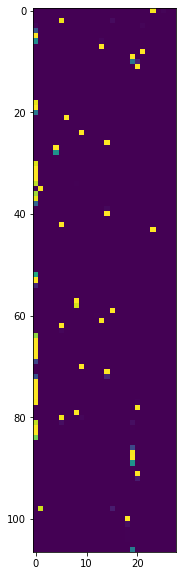

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(data_logits)
plt.show()